# figures paper HyDrop only 

In [1]:
import pycisTopic
pycisTopic.__version__

'2.0a0'

HyDrop v2 only n_cells × n_regions = 67080 × 1086684, 110 topics

In [2]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Patch
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [5]:
import pickle
infile = open('/lustre1/project/stg_00002/lcb/hydrop_v2_paper/revision/mcortex/cistopic_HyDropv2_only/cistopic_objs/cistopic_obj_otsu_mouse_cortex_filtered_HyDropv2_only_04082025_110_topics.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [6]:
cistopic_obj.cell_data.columns

Index(['FRIP', 'refined_annot_simple', 'Log_unique_nr_frag',
       'preliminary_mouse_annot_23072024', 'tech_simple',
       'dict_BICCN_corrected_08112024', 'Predicted_doublets_fragments', 'tech',
       'cleaned_up_annot_tech', 'beads', 'techxZu_paper_lift_over_simple',
       'pycisTopic_leiden_10_2', 'Zu_paper_lift_over_simple',
       'kde__log_Unique_nr_frag_in_regions__FRIP', 'barcode',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment', 'Total_nr_frag',
       'region_label', 'Dupl_nr_frag', 'Zu_paper_lift_over',
       'Doublet_scores_fragments', 'refined_annot',
       'Unique_nr_frag_in_regions', 'Log_total_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_nr_frag', 'kde__log_Unique_nr_frag_in_regions__Dupl_rate',
       'pycisTopic_leiden_10_1.2', 'cisTopic_nr_acc',
       'pycisTopic_leiden_10_2.5', 'sample_prep', 'TSS_enrichment',
       'cleaned_up_annot', 'sample_id', 'cisTopic_log_nr_frag',
   

In [7]:
cistopic_obj.cell_data['dict_BICCN_corrected_08112024'].unique()

array(['L6_IT', 'L5_IT', 'Sncg_Vip', 'L6_CT', 'Oligo', 'L4_IT', 'OPC',
       'Astro', 'L2_3_IT', 'L6b', 'Pvalb', 'Endo_VLMC', 'Sst', 'Lamp5',
       'L5_ET', 'Micro_PVM', 'L5_6_NP'], dtype=object)

In [8]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 67080 × 1086684


# color dict

In [9]:
color pallet: 
#CC79A7 - pink
#E69F00 - orange
#000000 - black
#56B4E9 - light blue
#009E73 - green
#F0E442 - yellow
#0072B2 - dark blue
#D55E00 - dark orange
#28787B - dark turqouise
#84BC3D - grass green
#CEA427 - brown
#547953 - grey green
#9772D3 - purple
#70DEC5 - turcoise
#8B167D - magenta
#C1C098 - light yellow/greyish
#E6A7E2 - light pink
#6A31EC - dark purple
#4C5BF2 - brownish purple

mouse:
#33CFA0 - hospital green
#5A5A11
#90BF5D
#E1CA38
#5BF5EE
#E037BF
#DE7830
#55508B
#26D2FA
#E07B1E
#843034
#6CD1CB
#11654D
#554766
#127B1A
#4676A3
#F74F3F
#F50F51
#E216A1

SyntaxError: invalid syntax (695630752.py, line 1)

In [10]:
color_dict = {'Zu_paper_lift_over_simple':
              {'Oligo': '#CC79A7', 
               'L2_3_IT': '#E69F00', 
               #'limbic_system': '#56B4E9', 
               #'D1_2_STR_INH': '#009E73', 
               'L6_CT': '#F0E442', 
               #'EXC_L4_IT_CTX': '#0072B2', 
               'Astro': '#D55E00', 
               'Micro_PVM': '#000000', 
               'OPC': '#28787B', 
               'L6_IT': '#84BC3D', 
               'Pvalb': '#CEA427', 
               #'AMY_BST_INH': '#547953', 
               #'Hippocampus_DG': '#9772D3', 
               'L5_ET': '#70DEC5', 
               'L5_6_NP': '#8B167D', 
               #'EXC_L2_IT_ENT_PPP': '#C1C098', 
               'L5_IT': '#9772D3', 
               'Sst': '#6A31EC', 
              #'EXC_PIR_L2_3_prime_ENT': '#4C5BF2',
               #'L2_3_IT_ENT': '#33CFA0', 
               #'INH_STR_OT_D3': '#5A5A11', 
               'Lamp5': '#90BF5D', 
              # 'AMY_Hypothalamic_area': '#E1CA38', 
               'L6b': '#5BF5EE', 
               #'L5_6_NP': '#E037BF', 
              # 'IT_AON_TT_DP': '#DE7830', 
               'Sncg_Vip': '#55508B', 
               #'Hippocampus_CA1': '#26D2FA', 
              # 'OB': '#E07B1E', 
               #'PAL-STR_INH': '#843034', 
               'Endo_VLMC': '#6CD1CB', 
               #'NA': '#11654D', 
              # 'LSX_INH': '#000000', 
               #'EXC_L6_L5_IT': '#554766', 
               #'CLA_EPd_L6_IT_Car3_plus_CTX': '#127B1A', 
              # 'OB_STR_CTX': '#4676A3', 
              # 'L2_3_IT_RsP_EXC': '#F74F3F', 
              # 'EXC_CA3_2': '#F50F51', 
              # 'Astroependymal_NN': '#E216A1'
              },
              'tech_simple':
              {'HyDrop_v2': '#E69F00', 
               '10x_v2': '#0072B2', 
               '10x_v1': '#000000', 
               'HyDrop_v1': '#F50F51'}}
                

In [11]:
colors_dict_BICCN_corrected_08112024 ={'Oligo': '#CC79A7', 
               'L2_3_IT': '#E69F00', 
              # 'limbic_system': '#56B4E9', 
               #'D1_2_STR_INH': '#009E73', 
               'L6_CT': '#F0E442', 
               'L4_IT': '#0072B2', 
               'Astro': '#D55E00', 
               'Micro_PVM': '#000000', 
               'OPC': '#28787B', 
               'L6_IT': '#84BC3D', 
               'Pvalb': '#CEA427', 
               #'AMY_BST_INH': '#547953', 
               #'Hippocampus_DG': '#9772D3', 
               #                        'EXC_L4_IT_CTX': '#0072B2', 
               'L5_ET': '#26D2FA', 
               'L5_6_NP': '#8B167D', 
               #'EXC_L2_IT_ENT_PPP': '#C1C098', 
               'L5_IT': '#9772D3', 
               'Sst': '#6A31EC', 
               #'EXC_PIR_L2_3_prime_ENT': '#4C5BF2',
               #'L2_3_IT_ENT': '#33CFA0', 
              # 'INH_STR_OT_D3': '#5A5A11', 
               'Lamp5': '#90BF5D', 
              # 'AMY_Hypothalamic_area': '#E1CA38', 
               'L6b': '#5BF5EE', 
               #'L5_6_NP': '#E037BF', 
               #'IT_AON_TT_DP': '#DE7830', 
               'Sncg_Vip': '#55508B', 
              # 'Hippocampus_CA1': '#26D2FA', 
              # 'OB': '#E07B1E', 
               #'PAL-STR_INH': '#843034', 
               'Endo_VLMC': '#6CD1CB', 
              # 'NA': '#11654D', 
              # 'LSX_INH': '#000000', 
               #'EXC_L6_L5_IT': '#554766', 
               #'CLA_EPd_L6_IT_Car3_plus_CTX': '#127B1A', 
              # 'OB_STR_CTX': '#4676A3', 
              # 'L2_3_IT_RsP_EXC': '#F74F3F', 
              # 'EXC_CA3_2': '#F50F51', 
              # 'Astroependymal_NN': '#E216A1'
                                  }

In [12]:
colors_tech = {'HyDrop_v2': '#E69F00', 
               '10x_v2': '#0072B2', 
               '10x_v1': '#000000', 
               'HyDrop_v1': '#F50F51'}

In [13]:
sample_counts = cistopic_obj.cell_data['beads'].value_counts().to_dict()
print(sample_counts)

{'HyDrop_v2_F': 18600, 'HyDrop_v2_B': 16862, 'HyDrop_v2_C': 10040, 'HyDrop_v2_D': 7764, 'HyDrop_v2_E': 7727, 'HyDrop_v2_A': 3281, 'HyDrop_v2_I': 2806}


In [14]:
colors_beads = {'HyDrop_v2_F': '#CC79A7', 
                'HyDrop_v2_B': '#E69F00', 
                'HyDrop_v2_E': '#56B4E9', 
                'HyDrop_v2_C': '#009E73', 
                'HyDrop_v2_D': '#F0E442', 
                'HyDrop_v2_A': '#0072B2', 
                'HyDrop_v2_I': '#D55E00'}

# tSNEs

In [15]:
cistopic_obj.cell_data.columns

Index(['FRIP', 'refined_annot_simple', 'Log_unique_nr_frag',
       'preliminary_mouse_annot_23072024', 'tech_simple',
       'dict_BICCN_corrected_08112024', 'Predicted_doublets_fragments', 'tech',
       'cleaned_up_annot_tech', 'beads', 'techxZu_paper_lift_over_simple',
       'pycisTopic_leiden_10_2', 'Zu_paper_lift_over_simple',
       'kde__log_Unique_nr_frag_in_regions__FRIP', 'barcode',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment', 'Total_nr_frag',
       'region_label', 'Dupl_nr_frag', 'Zu_paper_lift_over',
       'Doublet_scores_fragments', 'refined_annot',
       'Unique_nr_frag_in_regions', 'Log_total_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_nr_frag', 'kde__log_Unique_nr_frag_in_regions__Dupl_rate',
       'pycisTopic_leiden_10_1.2', 'cisTopic_nr_acc',
       'pycisTopic_leiden_10_2.5', 'sample_prep', 'TSS_enrichment',
       'cleaned_up_annot', 'sample_id', 'cisTopic_log_nr_frag',
   

In [16]:
cistopic_obj.projections

{'cell': {'UMAP':                                                        UMAP_1     UMAP_2
  CTCGATATCTACCAAGCGAAGGATGAGGAG___HYA__ac683b__2...   1.743572  16.551788
  TTATTGGCACCTGTTGAGATGGACGAACGG___HYA__ac683b__2...   8.314148  10.731750
  TCTGATACACGATAACCACATAGTGGTAAT___HYA__ac683b__2...   6.732428  10.098959
  CAACACACTATTCCTATCACTGACGGATAG___HYA__ac683b__2...  18.485723   5.607615
  TGAGCATCTATCGTGCGAGTTGATACAGCA___HYA__ac683b__2...  -2.328974   8.978487
  ...                                                       ...        ...
  CCTCAATGGCCAGCACATAGCTCGATTCAT___HYA__66fdea__2...  -2.356253  10.089300
  CGATCACTTACACCGTTCTTGTTAGTTGAC___HYA__66fdea__2...   0.562581   0.019949
  TCAAGAACTATACATACCAAATCGACCTTG___HYA__66fdea__2...  11.077801  12.861774
  TACGACGATGCACTACCTTCAGGAAGTTCG___HYA__66fdea__2...   8.378757  12.439886
  ATCGAAGGTAAGTCCACCGTAGACGTATTG___HYA__66fdea__2...  -0.318466  -0.734214
  
  [67080 rows x 2 columns],
  'tSNE':                                            

/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:519: FutureWarning: The provided callable <function mean at 0x14e24aaa80e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  label_pos = label_pd.groupby(var).agg(
/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:519: FutureWarning: The provided callable <function mean at 0x14e24aaa80e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  label_pos = label_pd.groupby(var).agg(
/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:526: FutureWarning: Series.__getite

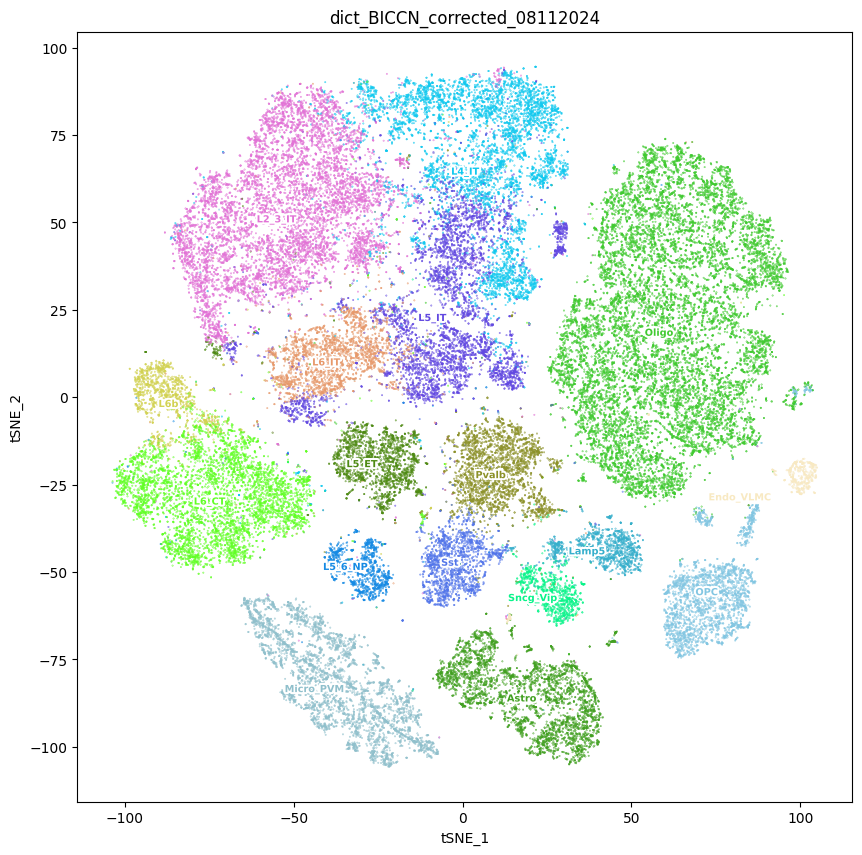

In [17]:
# model 110
plot_metadata(
    cistopic_obj,
    reduction_name='tSNE',
    variables=['dict_BICCN_corrected_08112024'],
    target='cell', num_columns=1,figsize = (10,10),
    text_size=7,
    color_dictionary = color_dict,
    dot_size=0.1)

## tech

/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:519: FutureWarning: The provided callable <function mean at 0x14e24aaa80e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  label_pos = label_pd.groupby(var).agg(
/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:519: FutureWarning: The provided callable <function mean at 0x14e24aaa80e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  label_pos = label_pd.groupby(var).agg(
/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:526: FutureWarning: Series.__getite

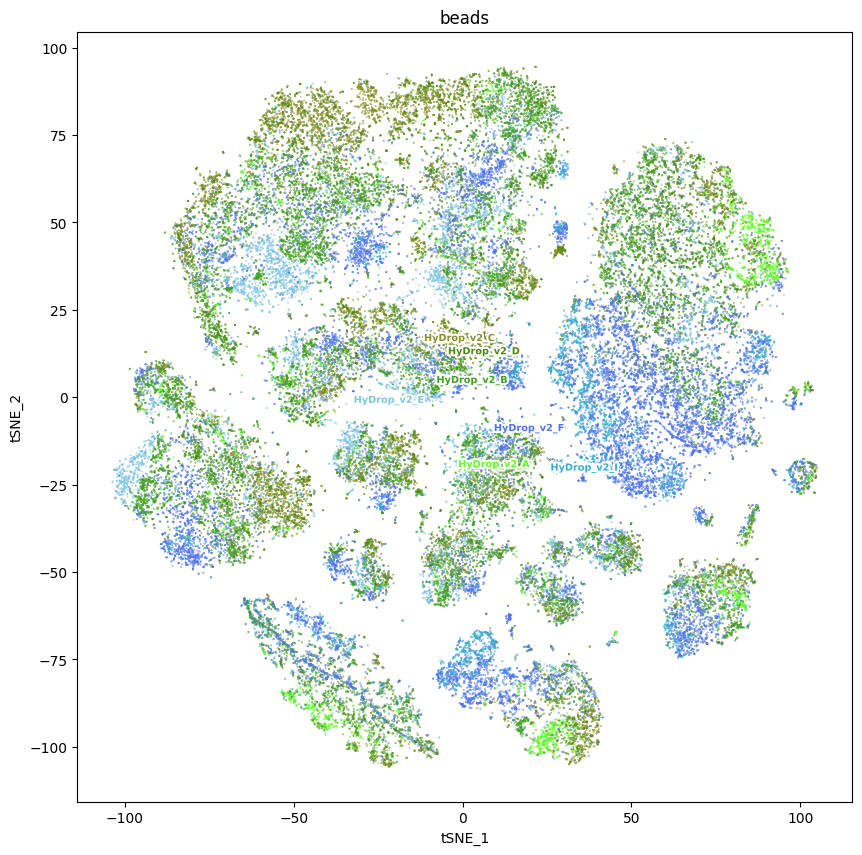

In [18]:
# model 110
plot_metadata(
    cistopic_obj,
    reduction_name='tSNE',
    variables=['beads'],
    target='cell', num_columns=1,figsize = (10,10),
    text_size=7,
    color_dictionary = color_dict,
    dot_size=0.1)

In [19]:
coord = cistopic_obj.projections["cell"]["tSNE"]

In [20]:
colors = [colors_beads[v] for v in cistopic_obj.cell_data['beads']]

In [21]:
index = np.arange(coord.shape[0])
random.shuffle(index)

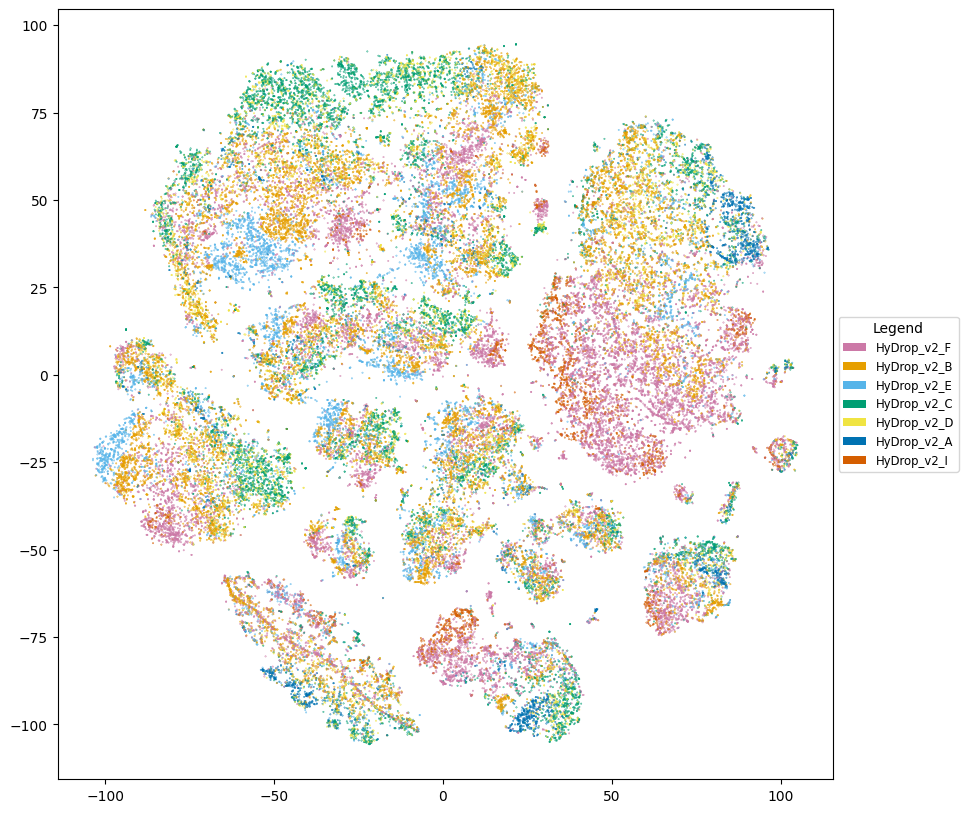

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(coord.iloc[index, 0], coord.iloc[index, 1], c=[colors[i] for i in index], s=0.1, alpha=1, )  # Using iloc for DataFrame indexing
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors_beads.items()]
ax.legend(handles=legend_elements, title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.savefig("tSNE_HyDrop_only_no_harmony_beads_hyDropV2_with_shuffling_tech.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)  # Save at 300 DPI for good quality
plt.show()

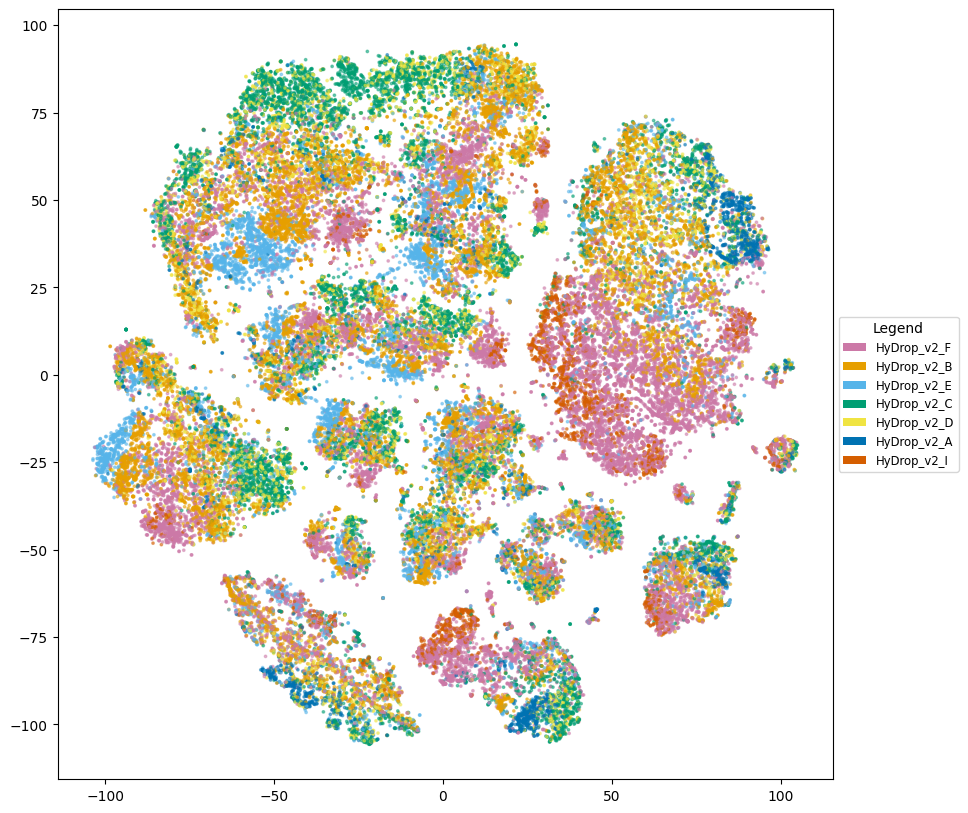

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(coord.iloc[index, 0], coord.iloc[index, 1], c=[colors[i] for i in index], s=3, alpha=0.5, rasterized = True)  # Using iloc for DataFrame indexing
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors_beads.items()]
ax.legend(handles=legend_elements, title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.savefig("tSNE_HyDrop_only_no_harmony_beads_hyDropV2_with_shuffling_tech_LARGERDOTS.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)  # Save at 300 DPI for good quality
plt.show()

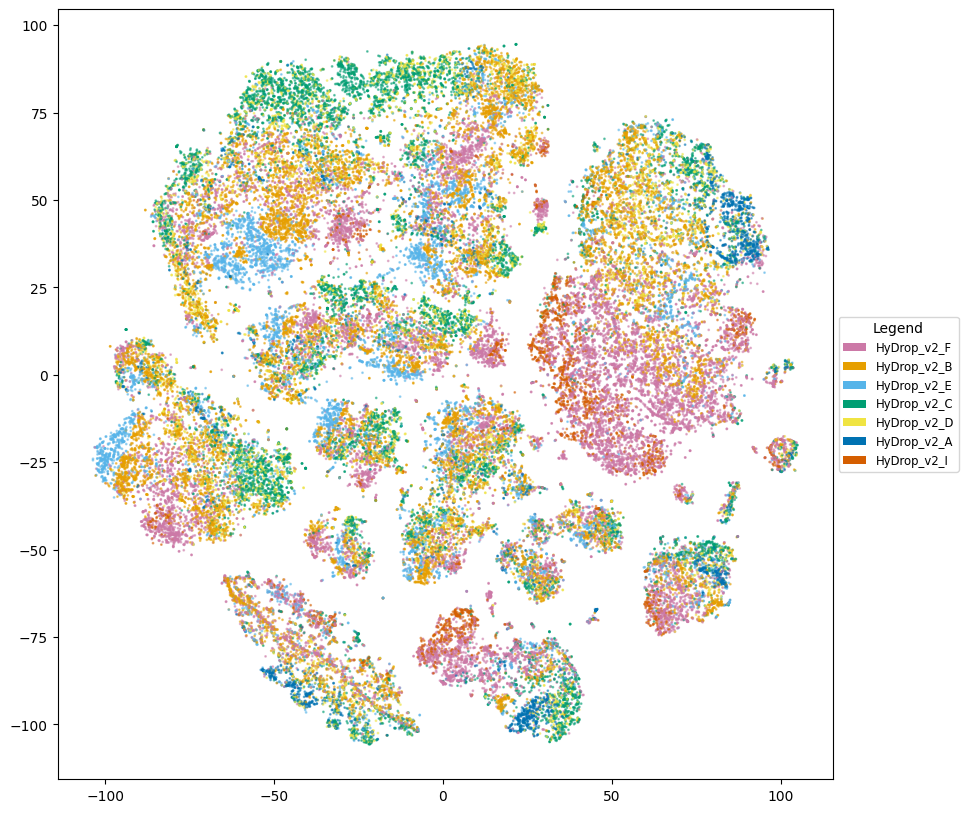

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(coord.iloc[index, 0], coord.iloc[index, 1], c=[colors[i] for i in index], s=1, alpha=0.5, rasterized = True)  # Using iloc for DataFrame indexing
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors_beads.items()]
ax.legend(handles=legend_elements, title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.savefig("tSNE_HyDrop_only_no_harmony_beads_hyDropV2_with_shuffling_tech_smallDOTS.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)  # Save at 300 DPI for good quality
plt.show()